In [1]:
#Load the ames.csv data.

import pandas as pd

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# import data
ames = pd.read_csv('../data/ames.csv')
ames.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


In [2]:
#Assess the distribution of the response variable

target_column = ames['Sale_Price']
target_column.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: Sale_Price, dtype: float64

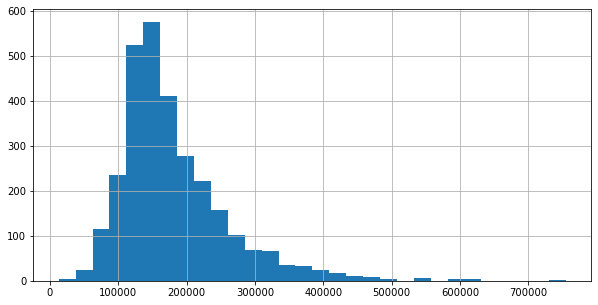

In [3]:
target_column.hist(figsize=(10, 5), bins=30);

In [4]:
#How many features are numeric vs. categorical?

#First drop the target
features = ames.drop(columns='Sale_Price')

import numpy as np

numeric_features = features.select_dtypes(np.number)
categorical_features = features.select_dtypes(object)

In [5]:
numeric_features.describe()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Longitude,Latitude
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.647782,10147.921843,1971.356314,1984.266553,101.096928,4.177474,49.705461,559.071672,1051.255631,1159.557679,...,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,-93.642897,42.034482
std,33.499441,7880.017759,30.245361,20.860286,178.634545,2.233372,169.142089,439.540571,440.968018,391.890885,...,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,0.025700,0.018410
min,0.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,-93.693153,41.986498
25%,43.000000,7440.250000,1954.000000,1965.000000,0.000000,3.000000,0.000000,219.000000,793.000000,876.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,-93.660217,42.022088
50%,63.000000,9436.500000,1973.000000,1993.000000,0.000000,3.000000,0.000000,465.500000,990.000000,1084.000000,...,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,-93.641806,42.034662
75%,78.000000,11555.250000,2001.000000,2004.000000,162.750000,7.000000,0.000000,801.750000,1301.500000,1384.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,-93.622113,42.049853
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,7.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,-93.577427,42.063388


In [6]:
categorical_features.describe()

,MS_SubClass,MS_Zoning,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,...,Garage_Type,Garage_Finish,Garage_Qual,Garage_Cond,Paved_Drive,Pool_QC,Fence,Misc_Feature,Sale_Type,Sale_Condition
count,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,...,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930
unique,16,7,2,3,4,4,3,5,3,28,...,7,4,6,6,3,5,5,6,10,6
top,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,...,Attchd,Unf,Typical,Typical,Paved,No_Pool,No_Fence,None,WD,Normal
freq,1079,2273,2918,2732,1859,2633,2927,2140,2789,443,...,1731,1231,2615,2665,2652,2917,2358,2824,2536,2413


In [7]:
#Pick a numeric feature that you believe would be influential on a home's Sale Price.
#Assess the distribution of the numeric feature. Assess the relationship between that feature and the Sale Price

numeric_features.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd',
       'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch',
       'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Year_Sold', 'Longitude',
       'Latitude'],
      dtype='object')

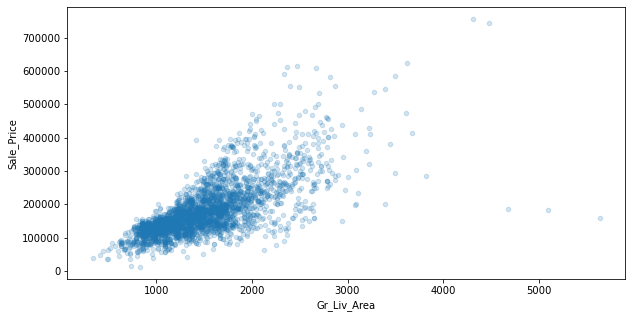

In [8]:
ames.plot.scatter(x='Gr_Liv_Area', y='Sale_Price', figsize=(10, 5), alpha=0.2);

In [9]:
categorical_features.columns

Index(['MS_SubClass', 'MS_Zoning', 'Street', 'Alley', 'Lot_Shape',
       'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood',
       'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style',
       'Overall_Qual', 'Overall_Cond', 'Roof_Style', 'Roof_Matl',
       'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating', 'Heating_QC',
       'Central_Air', 'Electrical', 'Kitchen_Qual', 'Functional',
       'Fireplace_Qu', 'Garage_Type', 'Garage_Finish', 'Garage_Qual',
       'Garage_Cond', 'Paved_Drive', 'Pool_QC', 'Fence', 'Misc_Feature',
       'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [10]:
categorical_features['Overall_Qual'].value_counts()

Average           825
Above_Average     732
Good              602
Very_Good         350
Below_Average     226
Excellent         107
Fair               40
Very_Excellent     31
Poor               13
Very_Poor           4
Name: Overall_Qual, dtype: int64

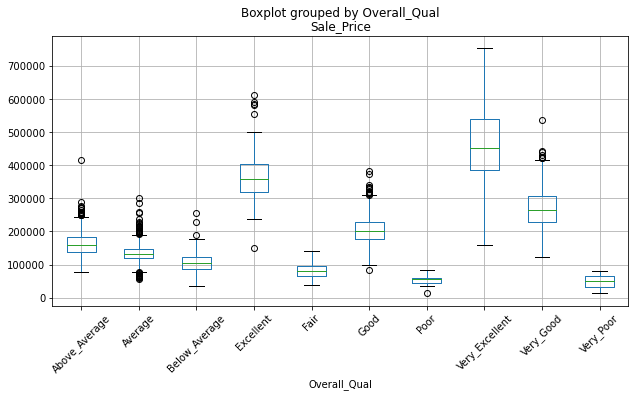

In [11]:
ames.boxplot(column='Sale_Price', by='Overall_Qual', figsize=(10,5), rot=45);

In [12]:
#Import my_module.py and use get_features_and_target to load the numeric features of the Ames data, along with the "Sale_Price" as a target column.

from my_module import get_features_and_target
numeric_features, target = get_features_and_target('../data/ames.csv', 'Sale_Price')

In [13]:
#Split the data into training and test sets. Use 75% of the data for training and 25% for testing.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    numeric_features, 
    target, 
    random_state=123, 
    test_size=0.25
)

In [14]:
#Fit a default KNeighborsRegressor model on the training data and score on the test data. Note that scoring on regression models provides the 𝑅2.
# 1. define the algorithm
# 2. fit the model
# 3. score our model on test data
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.6949157417705423

In [15]:
#Fit a default sklearn.linear_model.LinearRegression model on the training data and score on the test data.
# 1. define the algorithm
# 2. fit the model
# 3. score our model on test data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8104251490010687

In [16]:
#Fit a default sklearn.ensemble.RandomForestRegressor model on the training data and score on the test data.
# 1. define the algorithm
# 2. fit the model
# 3. score our model on test data
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.8775749053751095

In [17]:
#Fill in the blanks to standardize the numeric features and then apply a linear regression model. Does standardizing the numeric features improve the linear regression's 𝑅2?

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lm_model_scaled = make_pipeline(StandardScaler(), LinearRegression())
lm_model_scaled.fit(x_train, y_train)
lm_model_scaled.score(x_test, y_test)

0.8105740990145595

In [18]:
#Using the code chunks below, which computes the following:
#-identifies numeric, categorical, and ordinal columns in our full feature set,
#-replaces unique values in our ordinal columns (i.e. "No_basement", "No_garage"), and
#-creates our encoders for the numeric, categorical, and ordinal columns.

In [19]:
######## RUN THIS CODE CELL AS-IS ########
#I had to change the names of the features
# get columns of interest
numerical_columns = numeric_features.columns
ordinal_columns = categorical_features.filter(regex='Qual').columns
categorical_columns = categorical_features.drop(columns=ordinal_columns).columns

# replace unique values in our ordinal columns (i.e. "No_basement", "No_garage") with 'NA'
for col in ordinal_columns:
    features[col] = features[col].replace(to_replace='No_.*', value='NA', regex=True)
    
# split full feature set (numeric, categorical, & ordinal features) into train & test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=123)

In [20]:
######## RUN THIS CODE CELL AS-IS ########

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# create our numeric, categorical, and ordinal preprocessor encoders
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

ordinal_categories = [
    "NA", "Very_Poor", "Poor", "Fair", "Below_Average", "Average", "Typical",
    "Above_Average", "Good", "Very_Good", "Excellent", "Very_Excellent"
]
list_of_ord_cats = [ordinal_categories for col in ordinal_columns]
ordinal_preprocessor = OrdinalEncoder(categories=list_of_ord_cats)

In [21]:
#Now fill in the blanks to create our ColumnTransformer that:

#-standardizes numerical columns (preprocessor: numerical_preprocessor; columns of interest: numerical_columns)
#-one-hot encodes categorical columns (preprocessor: categorical_preprocessor; columns of interest: categorical_columns)
#-ordinal encodes ordinal columns (preprocessor: ordinal_preprocessor; columns of interest: ordinal_columns)

In [22]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('standard_scaler', numerical_preprocessor, numerical_columns),
    ('one_hot_encoder', categorical_preprocessor, categorical_columns),
    ('ordinal_encoder', ordinal_preprocessor, ordinal_columns),
])

In [25]:
#Now create a pipeline that includes the preprocessing step and applies a linear regression model. Does this improve the linear regression's 𝑅2?
lm_full = make_pipeline(preprocessor, LinearRegression())
_ = lm_full.fit(X_train, y_train)
lm_full.score(X_test, y_test)

0.8849929892348357

In [27]:
#If time allows, apply these preprocessing steps with a default random forest model and see if performance improves.
rf_full = make_pipeline(preprocessor, RandomForestRegressor())
_ = rf_full.fit(X_train, y_train)
rf_full.score(X_test, y_test)

0.8986947790858207